## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

%matplotlib inline

In [2]:
df=pd.read_csv('data.csv',skiprows=1,na_values='***')
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.10,-0.15,-0.23,-0.23,-0.18,-0.17,NaN,NaN,-0.11,-0.17,-0.20
1,1881,-0.20,-0.15,0.02,0.04,0.06,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.23,-0.16,-0.08,-0.15,-0.24,-0.17,-0.37,-0.11,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.29,-0.37,-0.12,-0.19,-0.18,-0.07,-0.08,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.28,-0.27,-0.11,-0.37,-0.31,-0.29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     144 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     146 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.8 KB


In [4]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,144.000000,145.000000,146.000000,145.000000,145.000000
mean,1952.500000,0.077466,0.085274,0.103014,0.075548,0.063836,0.045655,0.069103,0.068138,0.072621,0.098276,0.091379,0.065793,0.072690,0.073750,0.077379,0.081233,0.060621,0.087034
std,42.290661,0.448410,0.453553,0.460047,0.421547,0.398800,0.391288,0.373017,0.389644,0.390907,0.396431,0.405089,0.421256,0.394837,0.394743,0.431824,0.422041,0.381097,0.392517
min,1880.000000,-0.810000,-0.640000,-0.640000,-0.600000,-0.560000,-0.530000,-0.520000,-0.560000,-0.590000,-0.590000,-0.580000,-0.830000,-0.500000,-0.500000,-0.680000,-0.590000,-0.500000,-0.530000
25%,1916.250000,-0.247500,-0.237500,-0.237500,-0.250000,-0.247500,-0.250000,-0.200000,-0.220000,-0.200000,-0.200000,-0.190000,-0.220000,-0.200000,-0.220000,-0.240000,-0.257500,-0.230000,-0.190000
50%,1952.500000,-0.010000,-0.035000,0.015000,-0.015000,-0.035000,-0.050000,-0.030000,-0.040000,-0.060000,0.010000,0.020000,-0.040000,-0.030000,-0.050000,-0.030000,-0.015000,-0.040000,-0.020000
75%,1988.750000,0.320000,0.397500,0.345000,0.297500,0.280000,0.260000,0.260000,0.260000,0.250000,0.260000,0.280000,0.320000,0.310000,0.292500,0.370000,0.310000,0.280000,0.280000
max,2025.000000,1.380000,1.450000,1.400000,1.320000,1.170000,1.250000,1.210000,1.310000,1.490000,1.350000,1.420000,1.380000,1.290000,1.300000,1.360000,1.290000,1.250000,1.420000


In [5]:
df.shape

(146, 19)

In [6]:
df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64

In [7]:
df.dropna(inplace=True)

## Preprocssing

In [8]:
# Taking the year and January to December average
df_temp = df[['Year', 'J-D']].copy()
df_temp.rename(columns={'J-D': 'Temp_Anomaly'}, inplace=True)

In [9]:
df_temp.set_index('Year', inplace=True)

In [10]:
df_temp.head()

,Temp_Anomaly
Year,
1881,-0.09
1882,-0.11
1883,-0.18
1884,-0.28
1885,-0.34


In [11]:
# Taking the CO2 data
co2=pd.read_csv('co2.csv')
co2.head()

,Year,CO2_ppm
0,1880,291.500000
1,1881,292.399306
2,1882,293.298611
3,1883,294.197917
4,1884,295.097222


In [12]:
df_temp_reset = df_temp.reset_index()

# Merge on 'Year'
df_merged = pd.merge(df_temp_reset,co2,on='Year')

# Set Year as index again
df_merged.set_index('Year', inplace=True)

# Preview
df_merged.head()

,Temp_Anomaly,CO2_ppm
Year,,
1881,-0.09,292.399306
1882,-0.11,293.298611
1883,-0.18,294.197917
1884,-0.28,295.097222
1885,-0.34,295.996528


## EDA

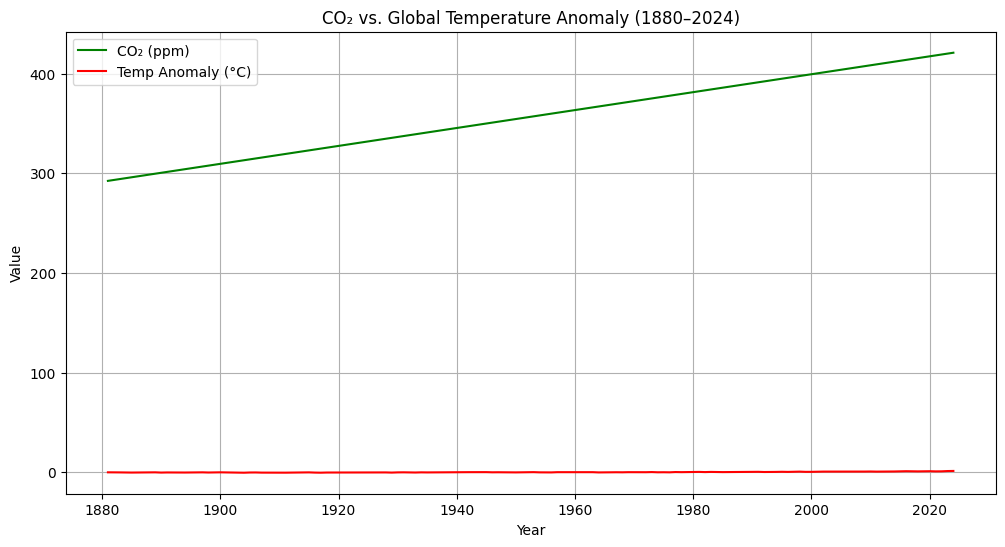

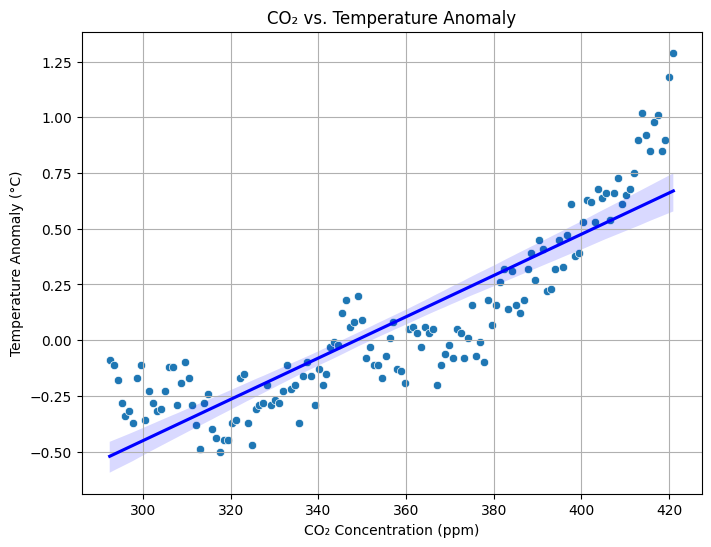

In [13]:
# Line plot: CO2 vs. Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df_merged.index, df_merged['CO2_ppm'], label='CO₂ (ppm)', color='green')
plt.plot(df_merged.index, df_merged['Temp_Anomaly'], label='Temp Anomaly (°C)', color='red')
plt.title('CO₂ vs. Global Temperature Anomaly (1880–2024)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot: CO2 vs Temp (correlation view)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='CO2_ppm', y='Temp_Anomaly')
sns.regplot(data=df_merged, x='CO2_ppm', y='Temp_Anomaly', scatter=False, color='blue')
plt.title('CO₂ vs. Temperature Anomaly')
plt.xlabel('CO₂ Concentration (ppm)')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


## Modelling

In [14]:
# Predicting the temperature for next years.
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"📊 {name}")
    print(f"  - Mean Squared Error: {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print("-" * 40)
    
    return {
        "name": name,
        "model": model,
        "mse": mse,
        "r2": r2,
        "y_pred": y_pred
    }

In [15]:
# Feature and target
X = df_merged[['CO2_ppm']]
y = df_merged['Temp_Anomaly']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Prepare data
X = df_merged[['CO2_ppm']]
y = df_merged['Temp_Anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {name}")
    print(f"  - Mean Squared Error: {mse:.4f}")
    print(f"  - R² Score: {r2:.4f}")
    print("-" * 40)
    return {
        "name": name,
        "model": model,
        "mse": mse,
        "r2": r2,
        "y_pred": y_pred
    }

# Models
models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression (deg=3)", make_pipeline(PolynomialFeatures(degree=3), LinearRegression())),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(objective='reg:squarederror', random_state=42)),
    ("Support Vector Regressor", make_pipeline(StandardScaler(), SVR(kernel='rbf'))),
    ("Neural Network (MLP)", make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)))
]

# Evaluate all
results = []
for name, model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(result)

📊 Linear Regression
  - Mean Squared Error: 0.0197
  - R² Score: 0.8241
----------------------------------------
📊 Polynomial Regression (deg=3)
  - Mean Squared Error: 0.0114
  - R² Score: 0.8982
----------------------------------------
📊 Random Forest
  - Mean Squared Error: 0.0096
  - R² Score: 0.9146
----------------------------------------
📊 XGBoost
  - Mean Squared Error: 0.0163
  - R² Score: 0.8545
----------------------------------------
📊 Support Vector Regressor
  - Mean Squared Error: 0.0103
  - R² Score: 0.9083
----------------------------------------
📊 Neural Network (MLP)
  - Mean Squared Error: 0.0107
  - R² Score: 0.9046
----------------------------------------


In [17]:
model = ARIMA(df_temp, order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Hardik Singh\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Hardik Singh\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Hardik Singh\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Temp_Anomaly   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 118.616
Date:                Sun, 15 Jun 2025   AIC                           -227.231
Time:                        17:41:35   BIC                           -212.417
Sample:                             0   HQIC                          -221.212
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2578      0.439      0.587      0.557      -0.603       1.118
ar.L2         -0.2888      0.248     -1.165      0.244      -0.774       0.197
ma.L1         -0.5518      0.444     -1.242      0.2

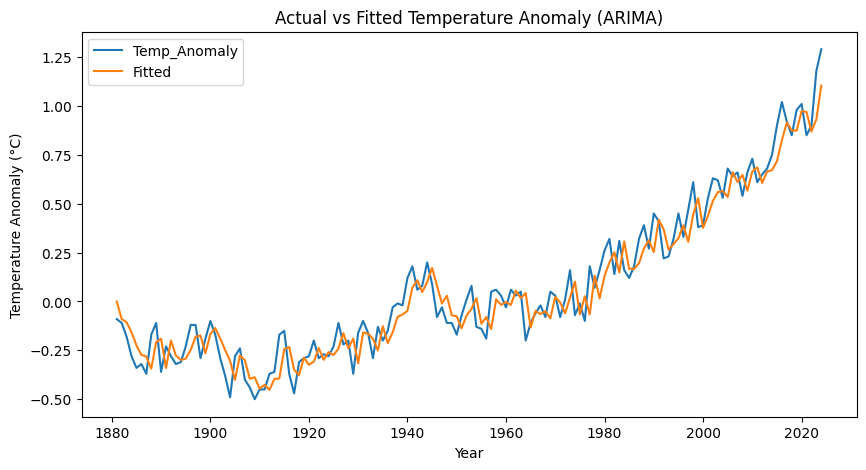

In [18]:
# Forecast in-sample
fitted_values = model_fit.fittedvalues
df_temp['Fitted'] = fitted_values

# Plot
df_temp[['Temp_Anomaly', 'Fitted']].plot(figsize=(10,5))
plt.title('Actual vs Fitted Temperature Anomaly (ARIMA)')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

In [19]:
mse = mean_squared_error(df_temp['Temp_Anomaly'].iloc[1:], df_temp['Fitted'].iloc[1:])
print(f"Training MSE (ARIMA): {mse:.4f}")

Training MSE (ARIMA): 0.0111


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-213.228, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-216.335, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-224.111, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-214.193, Time=0.01 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python31

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-229.558, Time=0.38 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-231.874, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-227.374, Time=0.06 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-233.406, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-232.572, Time=0.06 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-232.440, Time=0.37 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-232.998, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-229.902, Time=0.16 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-231.078, Time=0.08 sec


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-230.975, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-232.412, Time=0.13 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 2.693 seconds


c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Hardik Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hardik Singh\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hardik Singh\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  re

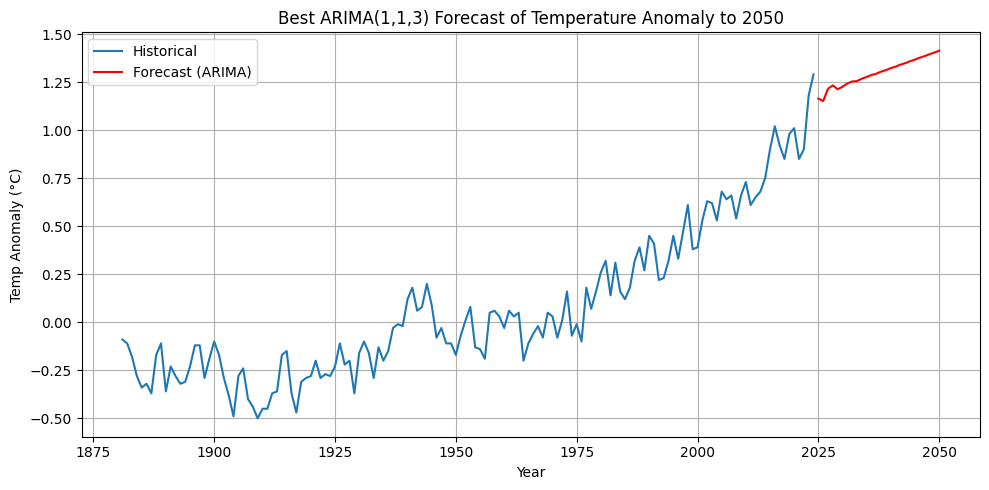

In [20]:
# Use auto_arima to find best model again (if needed)
model = auto_arima(df_temp['Temp_Anomaly'],
                   start_p=0, start_q=0,
                   max_p=5, max_q=5,
                   d=1, seasonal=False,
                   stepwise=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

# Fit the best model
model_fit = model.fit(df_temp['Temp_Anomaly'])

# Forecast to 2050
future_years = 26
forecast = model_fit.predict(n_periods=future_years)

# Create forecast index (years)
forecast_index = range(df_temp.index.max() + 1, 2051)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df_temp.index, df_temp['Temp_Anomaly'], label='Historical')
plt.plot(forecast_index, forecast, label='Forecast (ARIMA)', color='red')
plt.xlabel('Year')
plt.ylabel('Temp Anomaly (°C)')
plt.title('Best ARIMA(1,1,3) Forecast of Temperature Anomaly to 2050')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()